## Ensemble methods

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [6]:
data = load_wine()
data_df = pd.DataFrame(data.data, columns = data.feature_names)

data_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_df, data.target, test_size= 0.25, random_state=1)

**Decision Tree**

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decisionTree_classifier = DecisionTreeClassifier(min_samples_leaf = 3, random_state = 1)
decisionTree_classifier = decisionTree_classifier.fit(data_df, data.target)

Decision_tree_scores = cross_val_score(decisionTree_classifier, data_df, data.target)
Expected_values_decision_tree = [0.94444444, 0.80555556, 0.80555556, 0.91428571, 0.97142857]
print(f"Accuracy: {accuracy_score(y_test, decisionTree_classifier.predict(X_test))}")
print(f'Cross val score: {Decision_tree_scores}')
print(f'Expected values: {Expected_values_decision_tree}')

Accuracy: 0.9777777777777777
Cross val score: [0.94444444 0.80555556 0.80555556 0.91428571 0.97142857]
Expected values: [0.94444444, 0.80555556, 0.80555556, 0.91428571, 0.97142857]


**Bagging**

In [10]:
from sklearn.ensemble import BaggingClassifier

bagging_classifier = BaggingClassifier(base_estimator = DecisionTreeClassifier(min_samples_leaf=3, random_state=1), random_state=1, n_estimators=50)
bagging_classifier = bagging_classifier.fit(data_df, data.target)
Bagging_scores = cross_val_score(bagging_classifier, data_df, data.target)

Expected_values_bagging =  [0.91666667, 0.91666667, 0.94444444, 0.97142857, 1.]
print(f"Accuracy: {accuracy_score(y_test, bagging_classifier.predict(X_test))}")
print(f'Cross val score: {Bagging_scores}')
print(f'Expected values: {Expected_values_bagging}')

Accuracy: 1.0
Cross val score: [0.91666667 0.91666667 0.94444444 0.97142857 1.        ]
Expected values: [0.91666667, 0.91666667, 0.94444444, 0.97142857, 1.0]


**AdaBoost**

In [12]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost_classifier = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, random_state=1), random_state=1, n_estimators=50, algorithm='SAMME')
adaBoost_classifier = adaBoost_classifier.fit(data_df, data.target)
AdaBoost_score = cross_val_score(adaBoost_classifier, data_df, data.target)

Expected_values_Adaboost =  [0.83333333, 0.91666667, 0.91666667, 1, 1]
print(f"Accuracy: {accuracy_score(y_test, adaBoost_classifier.predict(X_test))}")
print(f'AdaBoost val score: {AdaBoost_score}')
print(f'Expected values: {Expected_values_Adaboost}')

Accuracy: 1.0
AdaBoost val score: [0.83333333 0.91666667 0.91666667 1.         1.        ]
Expected values: [0.83333333, 0.91666667, 0.91666667, 1, 1]


**Gradient boosting**

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

Gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=50, max_depth=1, learning_rate=1, random_state=1, subsample=0.5, min_samples_leaf=3)
Gradient_boosting_classifier = Gradient_boosting_classifier.fit(data_df, data.target)
Expected_values_Gradient_boosting = cross_val_score(Gradient_boosting_classifier, data_df, data.target)

expected_values_gradient_boosting = [0.91666667, 0.97222222, 0.97222222, 0.42857143, 0.97142857]
print(f"Accuracy: {accuracy_score(y_test, Gradient_boosting_classifier.predict(X_test))}")
print(f'Cross val score: {Expected_values_Gradient_boosting}')
print(f'Expected values: {expected_values_gradient_boosting}')

Accuracy: 1.0
Cross val score: [0.91666667 0.97222222 0.97222222 0.42857143 0.97142857]
Expected values: [0.91666667, 0.97222222, 0.97222222, 0.42857143, 0.97142857]


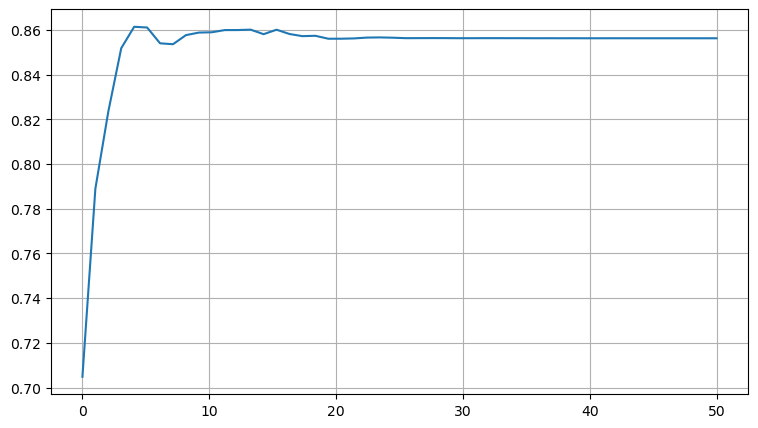

In [15]:
cumsum = np.cumsum(Gradient_boosting_classifier.oob_improvement_)
plt.figure(figsize=(9,5))
x_val = np.linspace(0,len(cumsum), 50)
plt.plot(x_val, cumsum)
plt.grid()
plt.show()